In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as md
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
df = pd.read_csv('2019-11-22.csv')

In [3]:
df.head()

Unnamed: 0 signal  bat1_id  bat1_loc bat1_condition pump_1 pump_2  \
0  21-11-2019-16:04:26    NaN      NaN       NaN   equal reward    NaN    NaN   
1  21-11-2019-16:04:27   play      NaN       NaN   equal reward    NaN    NaN   
2  21-11-2019-16:04:28    NaN      NaN       NaN   equal reward    NaN    NaN   
3  21-11-2019-16:04:29    NaN      NaN       NaN   equal reward    NaN    NaN   
4  21-11-2019-16:04:30    NaN      NaN       NaN   equal reward    NaN    NaN   

  bat2_id  bat2_loc bat2_condition  
0     NaN       NaN   equal reward  
1     NaN       NaN   equal reward  
2     NaN       NaN   equal reward  
3     NaN       NaN   equal reward  
4     NaN       NaN   equal reward

In [4]:
df.drop(['signal', 'bat1_id','bat1_loc','bat1_condition'], axis=1, inplace=True)

In [5]:
df.head()

Unnamed: 0 pump_1 pump_2 bat2_id  bat2_loc bat2_condition
0  21-11-2019-16:04:26    NaN    NaN     NaN       NaN   equal reward
1  21-11-2019-16:04:27    NaN    NaN     NaN       NaN   equal reward
2  21-11-2019-16:04:28    NaN    NaN     NaN       NaN   equal reward
3  21-11-2019-16:04:29    NaN    NaN     NaN       NaN   equal reward
4  21-11-2019-16:04:30    NaN    NaN     NaN       NaN   equal reward

In [6]:
df['bat2_id'].unique()

array([nan, '307410CD2C040B4000000001'], dtype=object)

In [7]:
df.rename(columns={'Unnamed: 0' :'time'}, inplace=True)

In [8]:
df.index = pd.to_datetime(df['time'], dayfirst=True)

In [9]:
df.drop(['time'], axis=1, inplace=True)

In [10]:
df.head()

pump_1 pump_2 bat2_id  bat2_loc bat2_condition
time                                                              
2019-11-21 16:04:26    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:27    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:28    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:29    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:30    NaN    NaN     NaN       NaN   equal reward

In [11]:
df.pump_1.unique()

array([nan, 'no 1', '1'], dtype=object)

In [12]:
# give score 1 to pump2, score -1 to pump1 and 0 to Nan
df_score = pd.DataFrame(df.copy())

In [13]:
mapping_1 = {'no 1': -1, '1': -1}
mapping_2 = {'no 2': 1, '2': 1}
df_score.replace({'pump_1': mapping_1, 'pump_2': mapping_2}, inplace= True)

In [14]:
df_score['pump_1'].fillna(0, inplace= True)
df_score['pump_2'].fillna(0, inplace= True)

In [15]:
df_score['pump_2'].unique()

array([0., 1.])

In [16]:
df_score.to_csv("21.11.19_score.csv")

In [ ]:
# filling the gaps in read #need to fix
df.bat2_id = df.bat2_id.fillna(method = 'pad', limit = 2)
df.bat2_loc = df.bat2_loc.fillna(method = 'pad', limit = 2)

In [ ]:
df.to_csv("fillna_test_14.11.19.csv")

In [ ]:
df.index[0].day

In [17]:
#create df_conds
df_no_idx = df.reset_index()

In [18]:
df.shift().shape

(60984, 5)

In [19]:
df_conds = pd.concat([df_no_idx['bat2_condition'], df_no_idx['bat2_condition'].shift()], axis=1)

In [20]:
df_conds

bat2_condition bat2_condition
0       equal reward            NaN
1       equal reward   equal reward
2       equal reward   equal reward
3       equal reward   equal reward
4       equal reward   equal reward
5       equal reward   equal reward
6       equal reward   equal reward
7       equal reward   equal reward
8       equal reward   equal reward
9       equal reward   equal reward
10      equal reward   equal reward
11      equal reward   equal reward
12      equal reward   equal reward
13      equal reward   equal reward
14      equal reward   equal reward
15      equal reward   equal reward
16      equal reward   equal reward
17      equal reward   equal reward
18      equal reward   equal reward
19      equal reward   equal reward
20      equal reward   equal reward
21      equal reward   equal reward
22      equal reward   equal reward
23      equal reward   equal reward
24      equal reward   equal reward
25      equal reward   equal reward
26      equal reward   equal reward
27      equal reward   equal reward
28      equal reward   equal reward
29      equal reward   equal reward
...              ...            ...
60954       R reward       R reward
60955       R reward       R reward
60956       R reward       R reward
60957       R reward       R reward
60958       R reward       R reward
60959       R reward       R reward
60960       R reward       R reward
60961       R reward       R reward
60962       R reward       R reward
60963       R reward       R reward
60964       R reward       R reward
60965       R reward       R reward
60966       R reward       R reward
60967       R reward       R reward
60968       R reward       R reward
60969       R reward       R reward
60970       R reward       R reward
60971       R reward       R reward
60972       R reward       R reward
60973       R reward       R reward
60974       R reward       R reward
60975       R reward       R reward
60976            NaN       R reward
60977       R reward            NaN
60978       R reward       R reward
60979            NaN       R reward
60980       R reward            NaN
60981       R reward       R reward
60982       R reward       R reward
60983       R reward       R reward

[60984 rows x 2 columns]

In [21]:
df_conds.columns = ['cond1', 'cond2']

In [22]:
df_conds = df_conds.fillna(method='ffill')

In [23]:
mask = df_conds['cond1'] != df_conds['cond2']

In [24]:
df_conds[mask]

cond1         cond2
0      equal reward           NaN
3600       R reward  equal reward
21601  equal reward      R reward
25201      R reward  equal reward
32402  equal reward      R reward
43202      R reward  equal reward

In [25]:
idx = df_conds[df_conds['cond1'] != df_conds['cond2']].index

In [26]:
idx

Int64Index([0, 3600, 21601, 25201, 32402, 43202], dtype='int64')

In [27]:
df_no_idx.shift().loc[idx]['time']

0                       NaT
3600    2019-11-21 17:04:25
21601   2019-11-21 22:04:26
25201   2019-11-21 23:04:26
32402   2019-11-22 01:04:27
43202   2019-11-22 04:04:28
Name: time, dtype: datetime64[ns]

In [28]:
idx_list = list(idx)

In [29]:
idx_list.remove(0)

In [30]:
idx_list = [x-1 for x in idx_list]

In [31]:
idx_list_max = idx_list + [df.index.shape[0]-1]
idx_list_min = [0] + [x+1 for x in idx_list]

In [32]:
idx_list_min

[0, 3600, 21601, 25201, 32402, 43202]

In [33]:
idx_list_max

[3599, 21600, 25200, 32401, 43201, 60983]

In [34]:
# 
df.iloc[idx_list]

pump_1 pump_2 bat2_id  bat2_loc bat2_condition
time                                                              
2019-11-21 17:04:25    NaN    NaN     NaN       NaN   equal reward
2019-11-21 22:04:26    NaN    NaN     NaN       NaN       R reward
2019-11-21 23:04:26    NaN    NaN     NaN       NaN   equal reward
2019-11-22 01:04:27    NaN    NaN     NaN       NaN       R reward
2019-11-22 04:04:28    NaN    NaN     NaN       NaN   equal reward

In [35]:
df['bat2_condition'].unique()

array(['equal reward', 'R reward', nan], dtype=object)

In [36]:
df['bat2_condition'].fillna('unknown', inplace=True)
# df.dropna(inplace=True)

In [37]:
df_min = df.iloc[idx_list_min]

In [38]:
df_max = df.iloc[idx_list_max]

In [39]:
df.index.shape

(60984,)

In [40]:
df_min.index

DatetimeIndex(['2019-11-21 16:04:26', '2019-11-21 17:04:26',
               '2019-11-21 22:04:27', '2019-11-21 23:04:27',
               '2019-11-22 01:04:28', '2019-11-22 04:04:29'],
              dtype='datetime64[ns]', name='time', freq=None)

In [41]:
df_max.index

DatetimeIndex(['2019-11-21 17:04:25', '2019-11-21 22:04:26',
               '2019-11-21 23:04:26', '2019-11-22 01:04:27',
               '2019-11-22 04:04:28', '2019-11-22 09:01:57'],
              dtype='datetime64[ns]', name='time', freq=None)

In [42]:
condition_start_end = list(zip(df_min.index, df_max.index))

In [43]:
condition_start_end

[(Timestamp('2019-11-21 16:04:26'), Timestamp('2019-11-21 17:04:25')),
 (Timestamp('2019-11-21 17:04:26'), Timestamp('2019-11-21 22:04:26')),
 (Timestamp('2019-11-21 22:04:27'), Timestamp('2019-11-21 23:04:26')),
 (Timestamp('2019-11-21 23:04:27'), Timestamp('2019-11-22 01:04:27')),
 (Timestamp('2019-11-22 01:04:28'), Timestamp('2019-11-22 04:04:28')),
 (Timestamp('2019-11-22 04:04:29'), Timestamp('2019-11-22 09:01:57'))]

In [44]:
df.head()

pump_1 pump_2 bat2_id  bat2_loc bat2_condition
time                                                              
2019-11-21 16:04:26    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:27    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:28    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:29    NaN    NaN     NaN       NaN   equal reward
2019-11-21 16:04:30    NaN    NaN     NaN       NaN   equal reward

In [46]:
df_bat1_choices = pd.read_csv('21.11.19_score.csv')

In [47]:
df_bat1_choices.head()

time  pump_1  pump_2 bat2_id  bat2_loc bat2_condition
0  2019-11-21 16:04:26     0.0     0.0     NaN       NaN   equal reward
1  2019-11-21 16:04:27     0.0     0.0     NaN       NaN   equal reward
2  2019-11-21 16:04:28     0.0     0.0     NaN       NaN   equal reward
3  2019-11-21 16:04:29     0.0     0.0     NaN       NaN   equal reward
4  2019-11-21 16:04:30     0.0     0.0     NaN       NaN   equal reward

In [48]:
df_bat1_choices['time'] = pd.to_datetime(df_bat1_choices['time'], dayfirst=True)

In [49]:
## new
df_bat1_choices['sum_pump'] = df_bat1_choices['pump_1']+df_bat1_choices['pump_2']

In [50]:
df_bat1_choices['sum_pump'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: sum_pump, dtype: float64

In [ ]:
# df_bat1_choices['moving avg'] = df_bat1_choices['sum_pump'].rolling(window=15).mean()

In [51]:
df_bat1_choices2 = df_bat1_choices.copy()
df_bat1_choices2.index = pd.to_datetime(df_bat1_choices2['time'], dayfirst=True)

In [52]:
df_bat1_choices2.head()

time  pump_1  pump_2 bat2_id  bat2_loc  \
time                                                                        
2019-11-21 16:04:26 2019-11-21 16:04:26     0.0     0.0     NaN       NaN   
2019-11-21 16:04:27 2019-11-21 16:04:27     0.0     0.0     NaN       NaN   
2019-11-21 16:04:28 2019-11-21 16:04:28     0.0     0.0     NaN       NaN   
2019-11-21 16:04:29 2019-11-21 16:04:29     0.0     0.0     NaN       NaN   
2019-11-21 16:04:30 2019-11-21 16:04:30     0.0     0.0     NaN       NaN   

                    bat2_condition  sum_pump  
time                                          
2019-11-21 16:04:26   equal reward       0.0  
2019-11-21 16:04:27   equal reward       0.0  
2019-11-21 16:04:28   equal reward       0.0  
2019-11-21 16:04:29   equal reward       0.0  
2019-11-21 16:04:30   equal reward       0.0

In [ ]:
# df_bat1_choices2['better moving avg'] = df.resample("15Min").sum().fillna(0).rolling(window=3, min_periods=1).mean()
# df_15 = df_bat1_choices2.resample('15Min').mean()

In [ ]:
# df_bat1_choices['15_min_avg'] = df_15['sum_pump']

In [ ]:
# df_15['sum_pump']

In [53]:
df_15_sum_r = df_bat1_choices2.resample('15Min', base=4, label='right').sum()
df_20_sum = df_bat1_choices2.resample('20Min', base=4, label='right').sum()

In [54]:
df_10_mean = df_bat1_choices2.resample('10Min', base=4, label='right').mean()
df_20_mean = df_bat1_choices2.resample('20Min', base=4, label='right').mean()
df_15_mean = df_bat1_choices2.resample('15Min', base=4, label='right').mean()

In [55]:
df_10_mean['sum_pump']

time
2019-11-21 16:14:00    0.006969
2019-11-21 16:24:00    0.003333
2019-11-21 16:34:00    0.001667
2019-11-21 16:44:00    0.001667
2019-11-21 16:54:00    0.000000
2019-11-21 17:04:00    0.000000
2019-11-21 17:14:00    0.000000
2019-11-21 17:24:00   -0.001667
2019-11-21 17:34:00   -0.001667
2019-11-21 17:44:00    0.001667
2019-11-21 17:54:00    0.000000
2019-11-21 18:04:00    0.000000
2019-11-21 18:14:00    0.000000
2019-11-21 18:24:00    0.000000
2019-11-21 18:34:00    0.001667
2019-11-21 18:44:00    0.000000
2019-11-21 18:54:00    0.000000
2019-11-21 19:04:00    0.000000
2019-11-21 19:14:00    0.000000
2019-11-21 19:24:00    0.006667
2019-11-21 19:34:00    0.001667
2019-11-21 19:44:00    0.001667
2019-11-21 19:54:00    0.000000
2019-11-21 20:04:00    0.003333
2019-11-21 20:14:00    0.000000
2019-11-21 20:24:00    0.001667
2019-11-21 20:34:00    0.001667
2019-11-21 20:44:00    0.000000
2019-11-21 20:54:00    0.003333
2019-11-21 21:04:00    0.003333
                         ...   
201

In [56]:
# df_20_sum.index
df_20_mean['sum_pump']

time
2019-11-21 16:24:00    0.005111
2019-11-21 16:44:00    0.001667
2019-11-21 17:04:00    0.000000
2019-11-21 17:24:00   -0.000833
2019-11-21 17:44:00    0.000000
2019-11-21 18:04:00    0.000000
2019-11-21 18:24:00    0.000000
2019-11-21 18:44:00    0.000833
2019-11-21 19:04:00    0.000000
2019-11-21 19:24:00    0.003333
2019-11-21 19:44:00    0.001667
2019-11-21 20:04:00    0.001667
2019-11-21 20:24:00    0.000833
2019-11-21 20:44:00    0.000833
2019-11-21 21:04:00    0.003333
2019-11-21 21:24:00   -0.000833
2019-11-21 21:44:00    0.002500
2019-11-21 22:04:00    0.008333
2019-11-21 22:24:00    0.002500
2019-11-21 22:44:00    0.003333
2019-11-21 23:04:00    0.000000
2019-11-21 23:24:00    0.000833
2019-11-21 23:44:00    0.000833
2019-11-22 00:04:00    0.000000
2019-11-22 00:24:00    0.003333
2019-11-22 00:44:00    0.000833
2019-11-22 01:04:00    0.000000
2019-11-22 01:24:00    0.000000
2019-11-22 01:44:00    0.000833
2019-11-22 02:04:00    0.001667
2019-11-22 02:24:00    0.005000
201

In [ ]:
# df_bat1_choices2['better moving avg'] = df_bat1_choices2['bat1_loc'].rolling('1h', min_periods=1).mean()
# df.rolling('2s', min_periods=1).sum()

In [ ]:
# df_15 = df_bat1_choices2.resample('15Min').mean()
# df.groupby(pd.Grouper(level='times', freq='H')).median() #check this

In [ ]:
df_20_sum.head()

In [ ]:
# df_15.index = pd.to_datetime(df_15.index, dayfirst=True)

In [ ]:
# df_15.index[0].hour

In [64]:
df.groupby(['pump_2', 'bat2_condition']).size()

pump_2  bat2_condition
2       R reward          55
        equal reward      35
no 2    R reward          14
        equal reward      22
dtype: int64

In [65]:
df.groupby(['bat2_condition', 'pump_2']).size()

bat2_condition  pump_2
R reward        2         55
                no 2      14
equal reward    2         35
                no 2      22
dtype: int64

In [66]:
df.groupby(['bat2_condition', 'pump_1']).size()

bat2_condition  pump_1
R reward        1          1
                no 1      10
equal reward    1          4
                no 1       2
dtype: int64

In [ ]:
df_bat1_choices2.tail()

In [57]:
pd.plotting.register_matplotlib_converters(explicit=True)

In [ ]:
# for min_time,max_time in condition_start_end:
#     print (min_time.month,max_time.day)

<Figure size 1080x1080 with 0 Axes>

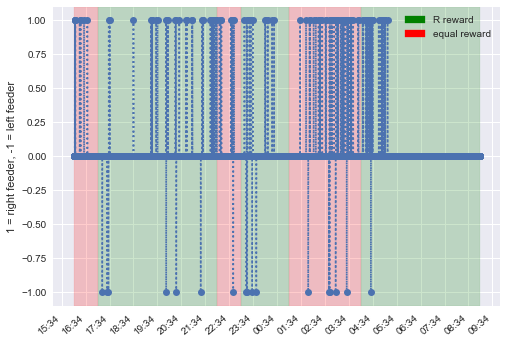

In [62]:
# # df_bat1_choices = df_bat1_choices.dropna()
fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_bat1_choices['time'], df_bat1_choices['sum_pump'], linestyle=':')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

<Figure size 1080x1080 with 0 Axes>

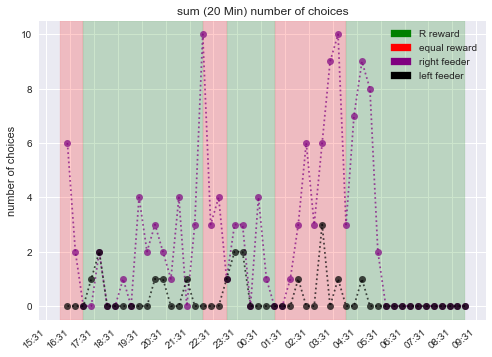

In [63]:
# compare between number of choices in each feeder (total ? choices)
""" change base to real start, check cond if it is right"""
fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_20_sum.index, df_20_sum['pump_2'], c = 'purple', alpha = 0.7, linestyle=':')
plt.plot_date(df_20_sum.index, np.abs(df_20_sum['pump_1']), c = 'black', alpha = 0.7, linestyle=':')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('number of choices')
plt.title ('sum (20 Min) number of choices')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
r_line = mpatches.Patch(color='purple', label='right feeder')
l_line = mpatches.Patch(color='black', label='left feeder')
plt.legend(handles=[g_patch,r_patch,r_line,l_line], loc='upper right')

In [ ]:
# compare between number of choices in each feeder (total ? choices)
""" change base to real start, check cond if it is right"""
fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_15_sum_r.index, df_15_sum_r['pump_2'], c = 'purple', alpha = 0.7, linestyle=':')
plt.plot_date(df_15_sum_r.index, np.abs(df_15_sum_r['pump_1']), c = 'black', alpha = 0.7, linestyle=':')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('number of choices')
plt.title ('sum (15 Min) number of choices')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
r_line = mpatches.Patch(color='purple', label='right feeder')
l_line = mpatches.Patch(color='black', label='left feeder')
plt.legend(handles=[g_patch,r_patch,r_line,l_line], loc='upper right')

<Figure size 1080x1080 with 0 Axes>

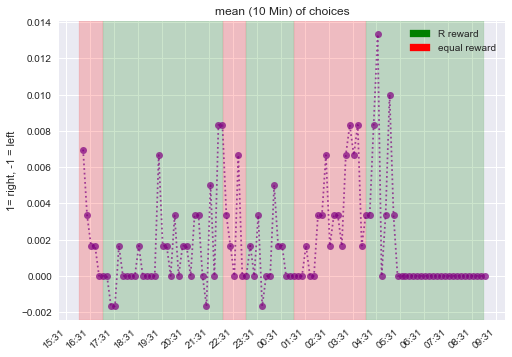

In [60]:
""" change base to real start, check cond if it is right"""
fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_10_mean.index, df_10_mean['sum_pump'], c = 'purple', alpha = 0.7, linestyle=':')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1= right, -1 = left')
plt.title ('mean (10 Min) of choices')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
# r_line = mpatches.Patch(color='purple', label='right feeder')
# l_line = mpatches.Patch(color='black', label='left feeder')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [ ]:
# plt.scatter(x, y, s=z*1000plt.scatter(x, y, s=z*1000

fig = plt.figure(figsize=(15,15))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
# choices = plt.scatter(df_15.index, df_15['sum_pump']) #scatter isn't good
choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'equal reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# # ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='equal reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [ ]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_bat1_choices['time'], df_bat1_choices2['better moving avg'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('2 = right feeder, 1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [ ]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(df_15.index, df_15['bat1_loc'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('2 = right feeder, 1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    # min_time = pd.to_datetime(min_time)
    # max_time = pd.to_datetime(max_time)
    cond = df_min.loc[min_time]['bat2_condition']
    # print (cond, min_time, max_time)
    plt.axvspan(min_time,max_time, alpha=0.2, color=cond_dict[cond])
# # act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [ ]:
# df_bat1_choices = df_bat1_choices.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['bat1_loc'].value_counts(normalize=True)

In [ ]:
# activity_df = df.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts(normalize=True)

In [ ]:
# is_f2 = df_bat1['bat1_loc'] == "102" #filter/mask
# is_f1 = df_bat1['bat1_loc'] == "101" #filter/mask
# right_bat1 = df_bat1[is_f2]

In [ ]:
# pref_df = pd.read_csv("bat1_102_choices", header = None, names = ('time', 'pref'))
# pref_df = pd.read_csv("bat1_102_choices")
# pref_df['time'] = pd.to_datetime(pref_df['time'])
# fig = plt.figure(figsize=(10,10))
# figtemp, ax = plt.subplots(1, 1)
# # ax.plot(activity_df_right)
# # ax.scatter(pref_df['time'], pref_df['pref'])
# # ax = pref_df.plot.scatter(x='time',y = 'pref')
# plt.style.use('seaborn')
# plt.plot_date(pref_df['time'], pref_df['pref'], linestyle='solid')
# # pref_df.plot(x='time', y='pref', kind='scatter', ax=ax)
# # Set time format and the interval of ticks (every 15 minutes)
# xformatter = md.DateFormatter('%H:%M')
# xlocator = md.MinuteLocator(interval = 60)
# # Set xtick labels to appear every 60 minutes
# ax.xaxis.set_major_locator(xlocator)
# ## Format xtick labels as HH:MM
# plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# # rotate_labels...
# for label in ax.get_xticklabels():
#     label.set_rotation(40)
#     label.set_horizontalalignment('right')

# cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
# for min_time,max_time in condition_start_end:
#     cond = df_min.loc[min_time]['condition']
#     plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])

In [ ]:
# activity_df_right = activity_df.xs("b'2'", level='feeder') #find only right

In [ ]:
activity_df = pd.read_csv('activity_15Min')

In [ ]:
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])

In [ ]:
activity_df.head()

In [ ]:
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df = activity_df[is_b2]

In [ ]:
right_sec_df.head()

In [ ]:
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df = activity_df[is_b1]

In [ ]:
left_sec_df.head()

In [ ]:

fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df['time'], right_sec_df['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [ ]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
left_activity = plt.plot_date(left_sec_df['time'], left_sec_df['activity'], linestyle='solid', label = 'Left feeder activity')

plt.ylabel('Time spend on left feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Left feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [ ]:
activity_df = pd.read_csv('activity_10Min')
activity_df.rename(columns={"feeder.1": "activity"}, inplace=True)
activity_df['time'] = pd.to_datetime(activity_df['time'])
is_b2 = activity_df['feeder'] == "b'2'" #filter/mask
right_sec_df10 = activity_df[is_b2]
is_b1 = activity_df['feeder'] == "b'1'" #filter/mask
left_sec_df10 = activity_df[is_b1]

In [ ]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
right_activity = plt.plot_date(right_sec_df10['time'], right_sec_df10['activity'], linestyle='solid', label = 'Right feeder activity')

plt.ylabel('Time spend on right feeder (in sec)')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
act_label = ax.legend(['Right feeder activity'])
ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper right')

In [ ]:
choices_df_num = pd.read_csv('choices_df_num')
choices_df_num['time'] = pd.to_datetime(choices_df_num['time'])

In [ ]:
fig = plt.figure(figsize=(10,10))
figtemp, ax = plt.subplots(1, 1)
plt.style.use('seaborn')
choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'], linestyle='solid')
# choices = plt.plot_date(choices_df_num['time'], choices_df_num['moving avg'])

plt.ylabel('1 = right feeder, -1 = left feeder')
# Set time format and the interval of ticks (every 15 minutes)
xformatter = md.DateFormatter('%H:%M')
xlocator = md.MinuteLocator(interval = 60)
# Set xtick labels to appear every 60 minutes
ax.xaxis.set_major_locator(xlocator)
## Format xtick labels as HH:MM
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

cond_dict = { 'unknown': 'y', 'R reward': 'g', 'L reward': 'r'}
for min_time,max_time in condition_start_end:
    cond = df_min.loc[min_time]['condition']
    plt.axvspan(min_time, max_time, alpha=0.2, color=cond_dict[cond])
# act_label = ax.legend(['Right feeder activity'])
# ax = plt.gca().add_artist(act_label)
g_patch = mpatches.Patch(color='g', label='R reward')
r_patch = mpatches.Patch(color='r', label='L reward')
plt.legend(handles=[g_patch,r_patch], loc='upper left')

In [ ]:
# choices_grouped = choices_df_num.groupby(pd.Grouper(freq='15Min', base=8, label='right'))['feeder'].value_counts()

In [ ]:
df_test = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                 index = [pd.Timestamp('20130101 09:00:00'),
                           pd.Timestamp('20130101 09:00:02'),
                           pd.Timestamp('20130101 09:00:03'),
                           pd.Timestamp('20130101 09:00:05'),
                           pd.Timestamp('20130101 09:00:06')])

In [ ]:
df_test.rolling('2s', min_periods=1).sum()